In [257]:
using Revise
includet("../scripts/ned_ca_jaimesstats.jl")
using GLMakie
using WGLMakie
using CairoMakie
using JLD2

# Build/load the df

In [228]:
# df = make_jaimesstats_df(3:10)
df = load_object("../data/ned_ca/jaimesstats15.jld2")
describe(df)
# save_object(datadir("ned_ca", "jaimesstats_temp.jld2"), df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,code,75.3636,0,55.0,232,0,Int64
2,N,9.0,3,9.0,15,0,Int64
3,numstates,5040.62,8,512.0,32768,0,Int64
4,phi,0.348848,3.05176e-5,0.09375,1.0,0,Float64
5,Nac,123.954,1,2.0,32768,0,Int64
6,Nsingle,112.96,0,1.0,32768,0,Int64
7,Neq,10.7308,0,0.0,3246,0,Int64
8,Nneq,0.263112,0,0.0,7,0,Int64
9,Neqcyc,0.575175,0,0.0,180,0,Int64


# Exploratory plots

In [298]:
# make a selection of the df that is then plotted below
# sdf =  df[2 .<= ca_numenzymes.(df.code) .<= 4,:];
sdf =  df[ca_numenzymes.(df.code) .== 2,:];

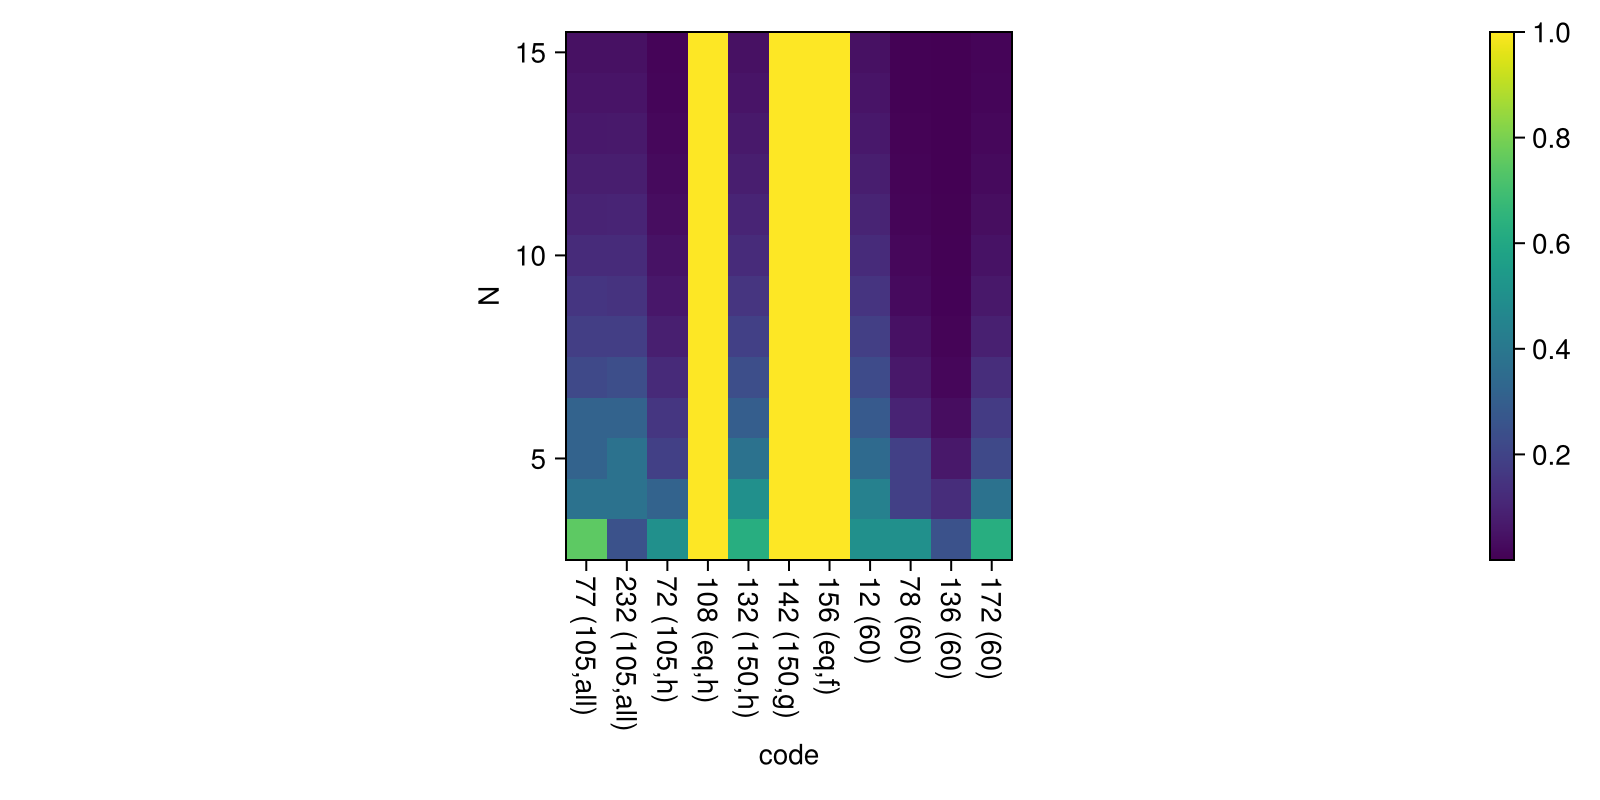

In [299]:
codes = unique(sdf.code)
code_i = map(c->findfirst(x->x==c, codes), sdf.code)

fig = Figure(size=(800, 400))
ax = Axis(fig[1,1], aspect=DataAspect())

# plot = scatter!(ax, code_i, sdf.N; color=sdf.phi, marker=:rect, markersize=20)
plot = heatmap!(ax, code_i, sdf.N, sdf.phi)
Colorbar(fig[1,2], plot)

ax.ylabel = "N"
ax.xlabel = "code"
ax.xticks = (1:length(codes), full_code_label.(codes; short=true))
ax.xticklabelrotation = -pi/2

fig

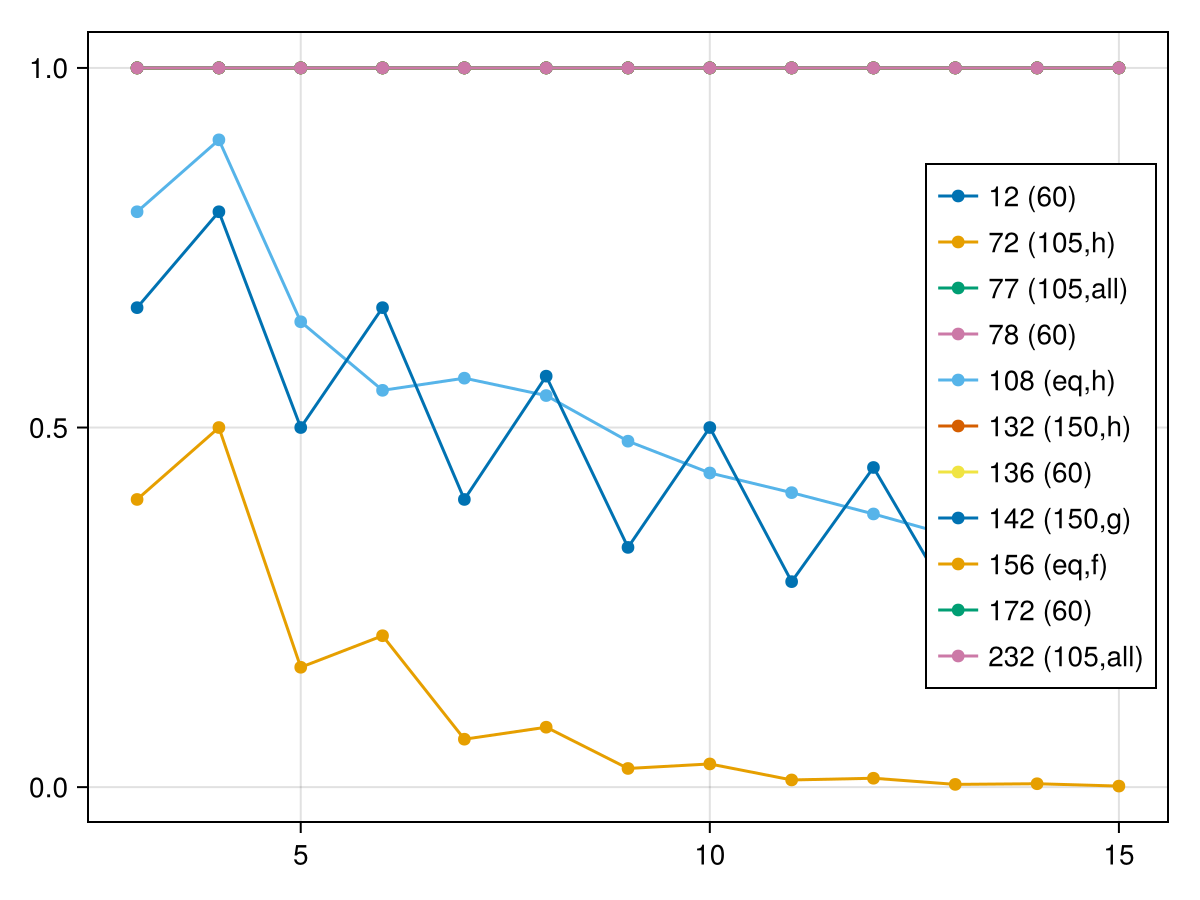

In [326]:
fig = Figure()
ax = Axis(fig[1,1];
    # yscale=Makie.pseudolog10
)
for gdf in groupby(sdf, :code)
    code = gdf.code[1]
    # scatterlines!(ax, gdf.N, gdf.phi; label=full_code_label(code; short=true))
    scatterlines!(ax, gdf.N, gdf.Nsingle ./ gdf.Nac; label=full_code_label(code; short=true))
end
axislegend(ax; position=:rc)
fig

In [193]:
display(GLMakie.Screen(), fap)

GLMakie.Screen(...)

In [295]:
ned = make_ca_ned(5, 57)
faa = plotgm(ned; layout=Spring(dim=3))
display(GLMakie.Screen(), faa)

K01 = [1 0; 1 1]
K10 = [1 0; 1 1]


GLMakie.Screen(...)